# Método de Newton Complexo

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Mar 2022

Referências:

[1] https://scipython.com/book2/chapter-8-scipy/examples/the-newton-fractal/


In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
#Nossa função de interesse
f = lambda z: z**3 + 1
df = lambda z: 3*z**2

#f = lambda z: z**4 - 1
#df = lambda z: 4*z**3


In [3]:
# Dominio [-1,1] x [-i,i]
a = 2

# Discretização do domínio em 2000 pontos
d = 2001j #numero de pontos entre -a e a (inclusive)

#Malha de reais em R2
x, y = np.ogrid[-a:a:d,-a:a:d] #Vetores

# Malha de complexos
z0 = x + 1j*y

#plt.figure()
#plt.plot(z0.real, z0.imag, ".")

In [5]:

#Iterações de Newton 
niter = 200
eps = 1.e-16
np.seterr(divide='ignore', invalid='ignore')

z = z0
for i in range(niter):
    dftmp = df(z)
    dftmp[ np.abs(dftmp) < eps ] = np.nan
    z -= f(z)/dftmp
        



In [6]:

#Saiu do domnínio?
z[ np.isnan(z) ] = 0.0 + 0j
z[ np.abs(z.real) > a-eps] = 0.0 + 0j
z[ np.abs(z.imag) > a-eps] = 0.0 + 0j
#print(np.angle(z))

#Raízes que achei
unique_roots = np.unique(z.round(decimals=2))
unique_roots = np.delete(unique_roots,(unique_roots==0j).argmax())
root_list = []
print("Raízes que achei (aproximadas):")
for root in unique_roots:
    root_list.append((root.real, root.imag))
    print(root)

nroots = len(unique_roots)


Raízes que achei (aproximadas):
(-1+0j)
(0.5-0.87j)
(0.5+0.87j)


In [14]:
#Transformar os valores das raízes imaginárias em cores! 
zcol= np.zeros_like(z, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots):
    zcol[np.abs(z-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
# zcol = zcol[:, ::-1]


# Cores das raízes
colors = [ 'b', 'r', 'g', 'y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots])

#print(zcol)

Roots: -1.0 0.0
Roots: 0.5 -0.87
Roots: 0.5 0.87


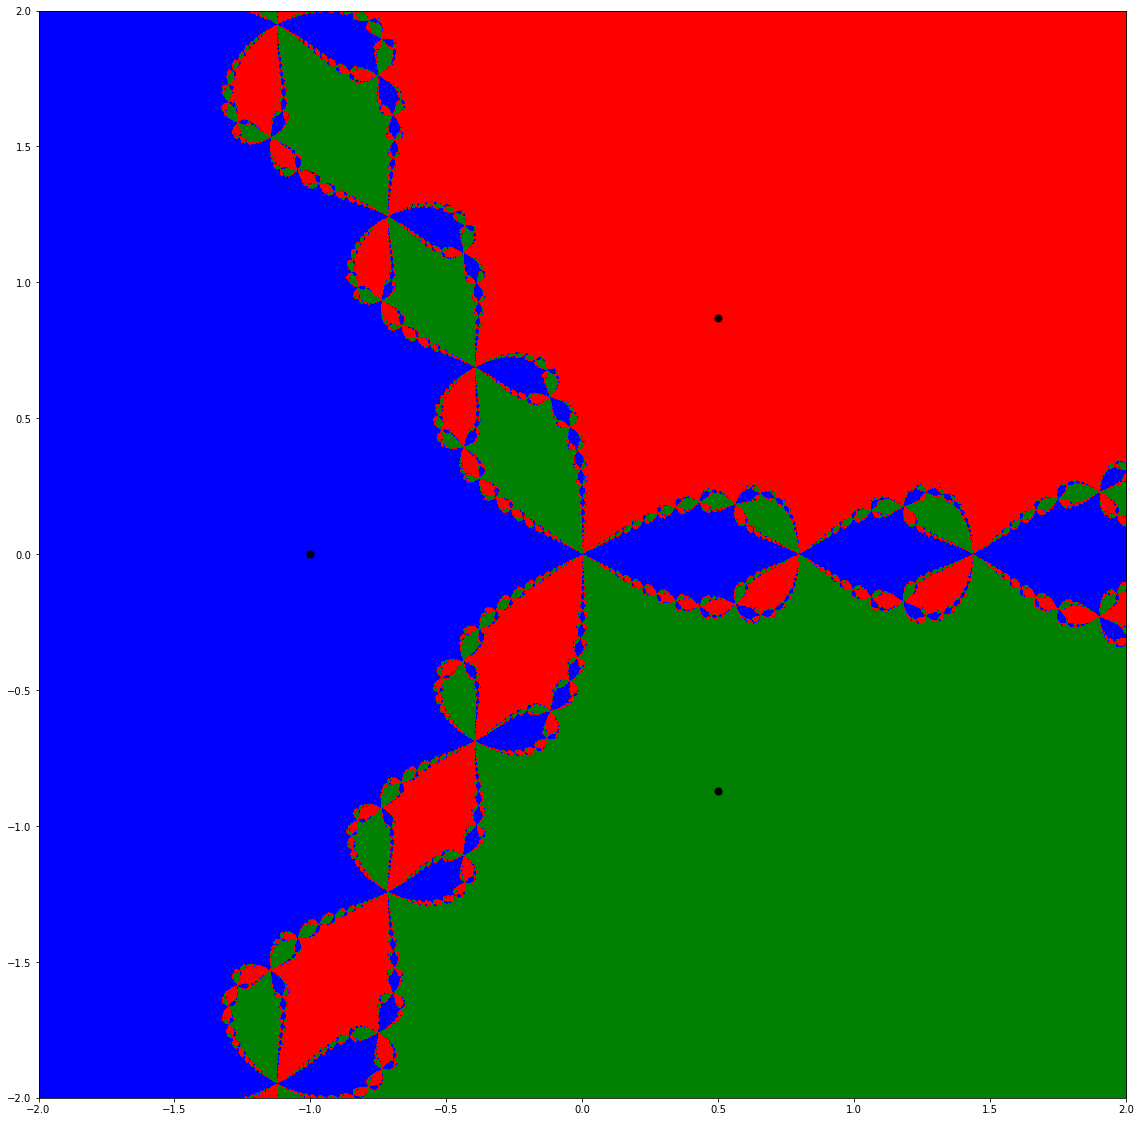

In [15]:
#Plot figure

plt.figure(figsize=(20,20))
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list:
    print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')

